In [23]:
import pandas as pd

df = pd.read_csv("Resume/Resume.csv")

print("Shape:", df.shape)
print("Columns:", df.columns)
print(df.head())


Shape: (2484, 4)
Columns: Index(['ID', 'Resume_str', 'Resume_html', 'Category'], dtype='object')
         ID                                         Resume_str  \
0  16852973           HR ADMINISTRATOR/MARKETING ASSOCIATE\...   
1  22323967           HR SPECIALIST, US HR OPERATIONS      ...   
2  33176873           HR DIRECTOR       Summary      Over 2...   
3  27018550           HR SPECIALIST       Summary    Dedica...   
4  17812897           HR MANAGER         Skill Highlights  ...   

                                         Resume_html Category  
0  <div class="fontsize fontface vmargins hmargin...       HR  
1  <div class="fontsize fontface vmargins hmargin...       HR  
2  <div class="fontsize fontface vmargins hmargin...       HR  
3  <div class="fontsize fontface vmargins hmargin...       HR  
4  <div class="fontsize fontface vmargins hmargin...       HR  


In [24]:
df.isnull().sum()

ID             0
Resume_str     0
Resume_html    0
Category       0
dtype: int64

In [25]:
print("Categories and counts:\n", df['Category'].value_counts())


Categories and counts:
 Category
INFORMATION-TECHNOLOGY    120
BUSINESS-DEVELOPMENT      120
FINANCE                   118
ADVOCATE                  118
ACCOUNTANT                118
ENGINEERING               118
CHEF                      118
AVIATION                  117
FITNESS                   117
SALES                     116
BANKING                   115
HEALTHCARE                115
CONSULTANT                115
CONSTRUCTION              112
PUBLIC-RELATIONS          111
HR                        110
DESIGNER                  107
ARTS                      103
TEACHER                   102
APPAREL                    97
DIGITAL-MEDIA              96
AGRICULTURE                63
AUTOMOBILE                 36
BPO                        22
Name: count, dtype: int64


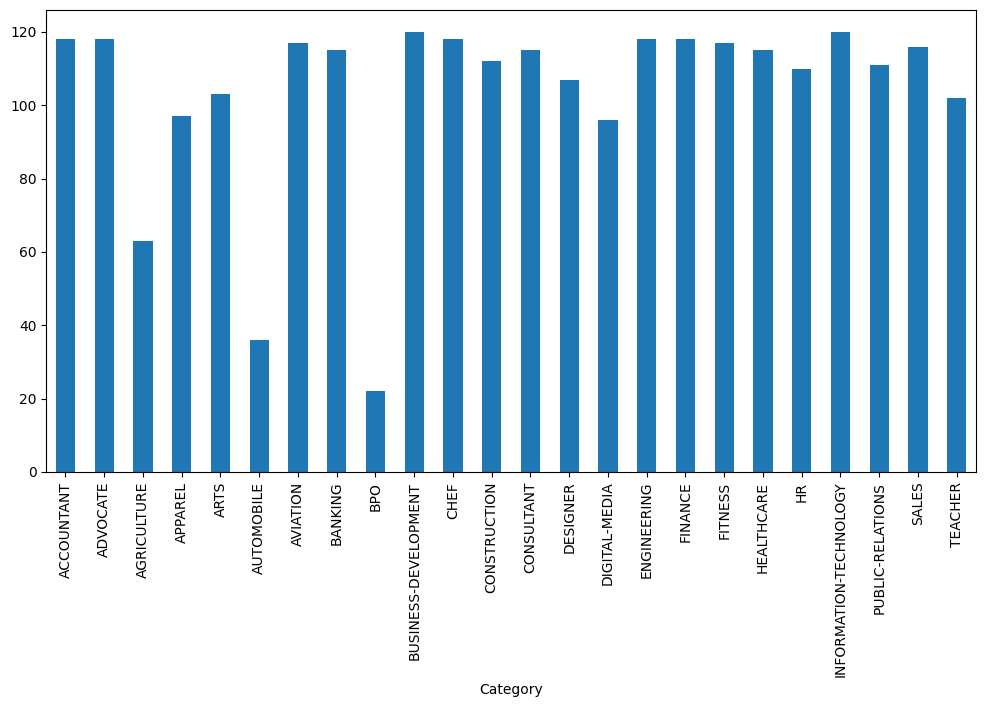

In [26]:
from matplotlib import pyplot as plt
df['Category'].value_counts().sort_index().plot(kind='bar', figsize=(12, 6))
plt.show()

In [27]:
import re
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Muzam\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [28]:
def clean_text(text):
    text = re.sub(r"http\S+|www\S+|https\S+", '', text)  # remove URLs
    text = re.sub(r'[^A-Za-z\s]', '', text)              # remove punctuation/symbols
    text = text.lower()                                  # convert to lowercase
    text = ' '.join([word for word in text.split() if word not in stop_words])  # remove stopwords
    return text

# Apply cleaning
df['cleaned_resume'] = df['Resume_str'].apply(clean_text)

# Preview
print(df[['Resume_str', 'cleaned_resume']].head(1).values[0])

["         HR ADMINISTRATOR/MARKETING ASSOCIATE\n\nHR ADMINISTRATOR       Summary     Dedicated Customer Service Manager with 15+ years of experience in Hospitality and Customer Service Management.   Respected builder and leader of customer-focused teams; strives to instill a shared, enthusiastic commitment to customer service.         Highlights         Focused on customer satisfaction  Team management  Marketing savvy  Conflict resolution techniques     Training and development  Skilled multi-tasker  Client relations specialist           Accomplishments      Missouri DOT Supervisor Training Certification  Certified by IHG in Customer Loyalty and Marketing by Segment   Hilton Worldwide General Manager Training Certification  Accomplished Trainer for cross server hospitality systems such as    Hilton OnQ  ,   Micros    Opera PMS   , Fidelio    OPERA    Reservation System (ORS) ,   Holidex    Completed courses and seminars in customer service, sales strategies, inventory control, loss p

In [29]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
df['Resume_str'] = df['Resume_str'].apply(lambda x: clean_text(x)) # Cleaning the text data

var_mod = ['Category'] # Encoding categorical labels
le = LabelEncoder()
for i in var_mod:
    df[i] = le.fit_transform(df[i])

requiredText = df['Resume_str'].values # Preparing text data and labels
requiredTarget = df['Category'].values

word_vectorizer = TfidfVectorizer( # Feature extraction using TF-IDF
    sublinear_tf=True,
    stop_words='english',
    max_features=1500)
word_vectorizer.fit(requiredText)
WordFeatures = word_vectorizer.transform(requiredText)

In [30]:
import joblib
joblib.dump(le, 'RS_LabelEncoder.pkl')

['RS_LabelEncoder.pkl']

In [31]:
joblib.dump(word_vectorizer, 'RS_Model_Vectorizer.pkl')

['RS_Model_Vectorizer.pkl']

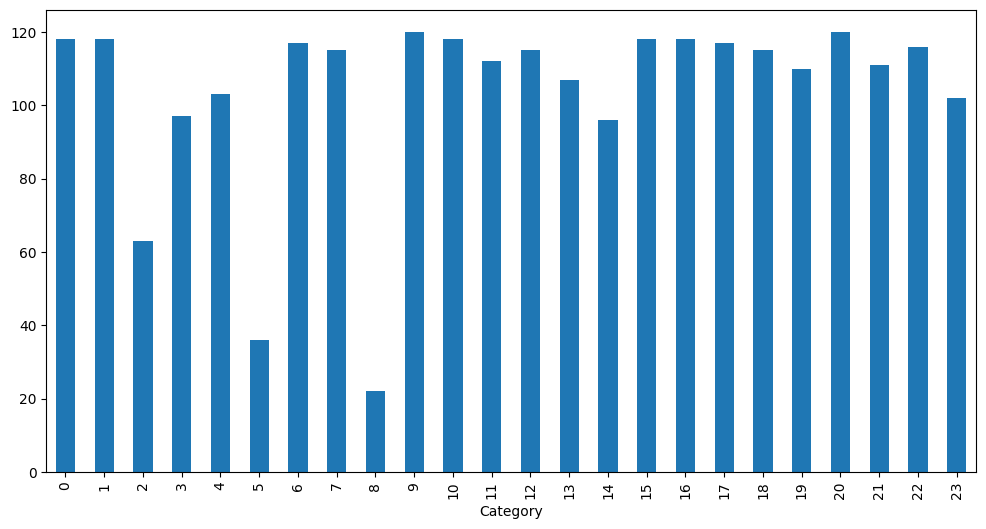

In [32]:
df['Category'].value_counts().sort_index().plot(kind='bar', figsize=(12, 6))
plt.show()

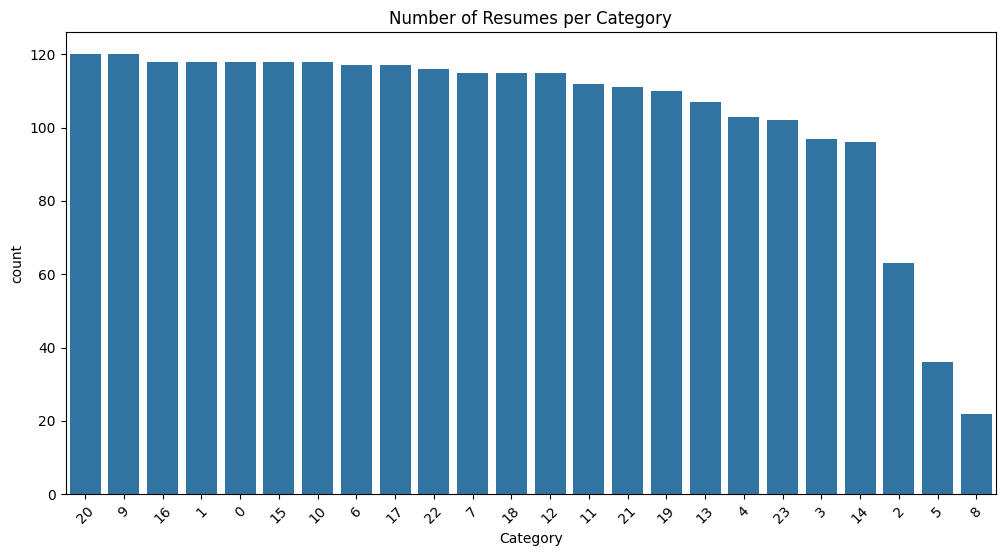

In [33]:
import seaborn as sns

plt.figure(figsize=(12,6))
sns.countplot(data=df, x='Category', order=df['Category'].value_counts().index)
plt.xticks(rotation=45)
plt.title('Number of Resumes per Category')
plt.show()

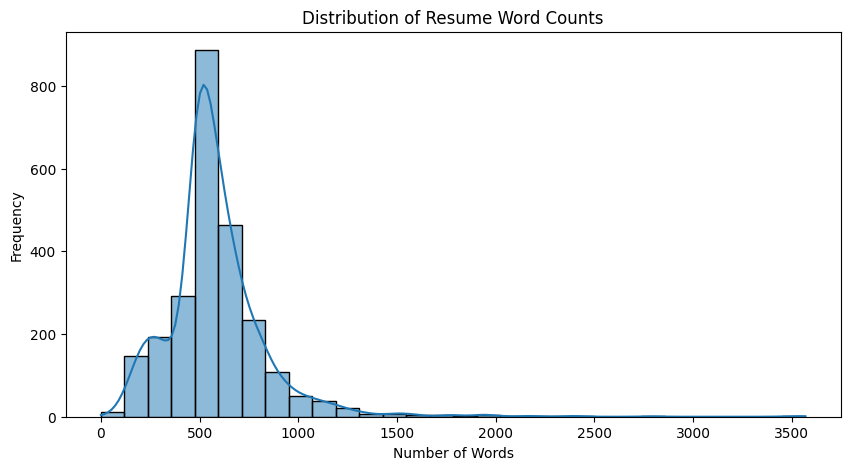

In [34]:
df['resume_length'] = df['cleaned_resume'].apply(lambda x: len(x.split()))

plt.figure(figsize=(10,5))
sns.histplot(df['resume_length'], bins=30, kde=True)
plt.title("Distribution of Resume Word Counts")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.show()

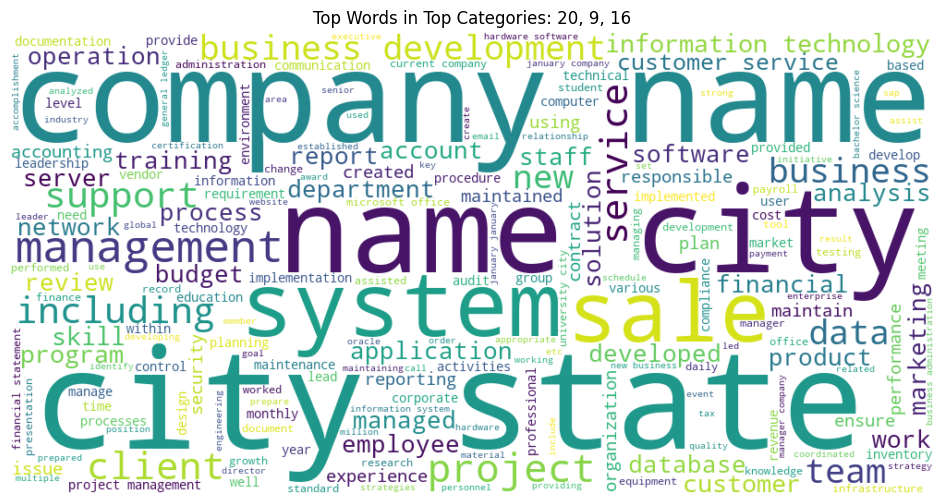

In [35]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

top_categories = df['Category'].value_counts().head(3).index

top_text = " ".join(df[df['Category'].isin(top_categories)]['cleaned_resume'])

wordcloud = WordCloud(width=1000, height=500, background_color='white').generate(top_text)

plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title(f"Top Words in Top Categories: {', '.join([str(cat) for cat in top_categories])}")
plt.show()


In [36]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(WordFeatures,requiredTarget, test_size=0.2)
print(X_train.shape)
print(X_test.shape)

(1987, 1500)
(497, 1500)


In [37]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
knn_prediction = knn_model.predict(X_test)

In [38]:
from sklearn.metrics import classification_report

print("Classification report for classifier %s:\n%s" % (knn_model, classification_report(y_test, knn_prediction)))

Classification report for classifier KNeighborsClassifier():
              precision    recall  f1-score   support

           0       0.53      0.83      0.65        24
           1       0.30      0.41      0.35        29
           2       0.50      0.12      0.20        16
           3       0.21      0.19      0.20        16
           4       0.27      0.35      0.31        17
           5       0.33      0.20      0.25         5
           6       0.64      0.56      0.60        25
           7       0.50      0.50      0.50        20
           8       0.00      0.00      0.00         2
           9       0.33      0.37      0.35        19
          10       0.80      0.94      0.86        17
          11       0.71      0.67      0.69        18
          12       0.38      0.32      0.34        19
          13       0.86      0.75      0.80        24
          14       0.59      0.57      0.58        23
          15       0.53      0.81      0.64        21
          16       0

In [39]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
lr_prediction = lr_model.predict(X_test)

In [40]:
print("Classification report for classifier %s:\n%s" % (lr_model, classification_report(y_test, lr_prediction)))

Classification report for classifier LogisticRegression():
              precision    recall  f1-score   support

           0       0.73      0.92      0.81        24
           1       0.62      0.45      0.52        29
           2       1.00      0.06      0.12        16
           3       0.50      0.31      0.38        16
           4       0.43      0.35      0.39        17
           5       0.00      0.00      0.00         5
           6       0.78      0.72      0.75        25
           7       0.71      0.60      0.65        20
           8       0.00      0.00      0.00         2
           9       0.36      0.47      0.41        19
          10       0.84      0.94      0.89        17
          11       0.82      0.78      0.80        18
          12       0.44      0.37      0.40        19
          13       0.82      0.75      0.78        24
          14       0.75      0.65      0.70        23
          15       0.54      0.95      0.69        21
          16       0.7

c:\Users\Muzam\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Muzam\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Muzam\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [41]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_prediction = rf_model.predict(X_test)

In [42]:
print("Classification report for classifier %s:\n%s" % (rf_model, classification_report(y_test, rf_prediction)))

Classification report for classifier RandomForestClassifier():
              precision    recall  f1-score   support

           0       0.71      0.92      0.80        24
           1       0.67      0.55      0.60        29
           2       0.50      0.06      0.11        16
           3       0.50      0.12      0.20        16
           4       0.60      0.35      0.44        17
           5       1.00      0.20      0.33         5
           6       0.91      0.84      0.88        25
           7       0.69      0.55      0.61        20
           8       0.00      0.00      0.00         2
           9       0.53      0.47      0.50        19
          10       0.76      0.94      0.84        17
          11       0.76      0.89      0.82        18
          12       0.56      0.47      0.51        19
          13       0.85      0.96      0.90        24
          14       0.77      0.74      0.76        23
          15       0.73      0.90      0.81        21
          16      

c:\Users\Muzam\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Muzam\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Muzam\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [43]:
import lightgbm as lgb
lgb_model = lgb.LGBMClassifier()
lgb_model.fit(X_train, y_train)
lgb_prediction = lgb_model.predict(X_test)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.041781 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 126937
[LightGBM] [Info] Number of data points in the train set: 1987, number of used features: 1500
[LightGBM] [Info] Start training from score -3.051086
[LightGBM] [Info] Start training from score -3.105745
[LightGBM] [Info] Start training from score -3.744234
[LightGBM] [Info] Start training from score -3.199932
[LightGBM] [Info] Start training from score -3.140034
[LightGBM] [Info] Start training from score -4.160394
[LightGBM] [Info] Start training from score -3.072593
[LightGBM] [Info] Start training from score -3.040504
[LightGBM] [Info] Start training from score -4.598649
[LightGBM] [Info] Start training from score -2.979261
[LightGBM] [Info] Start training from score -2.979261
[LightGBM] [Info] Start training from score -3.051

In [44]:
print("Classification report for classifier %s:\n%s" % (lgb_model, classification_report(y_test, lgb_prediction)))

Classification report for classifier LGBMClassifier():
              precision    recall  f1-score   support

           0       0.88      0.92      0.90        24
           1       0.69      0.62      0.65        29
           2       0.80      0.25      0.38        16
           3       0.55      0.38      0.44        16
           4       0.57      0.47      0.52        17
           5       0.67      0.40      0.50         5
           6       0.96      0.88      0.92        25
           7       0.65      0.65      0.65        20
           8       0.00      0.00      0.00         2
           9       0.69      0.58      0.63        19
          10       0.94      0.94      0.94        17
          11       0.83      0.83      0.83        18
          12       0.59      0.68      0.63        19
          13       0.89      1.00      0.94        24
          14       0.78      0.78      0.78        23
          15       0.73      0.90      0.81        21
          16       0.85   

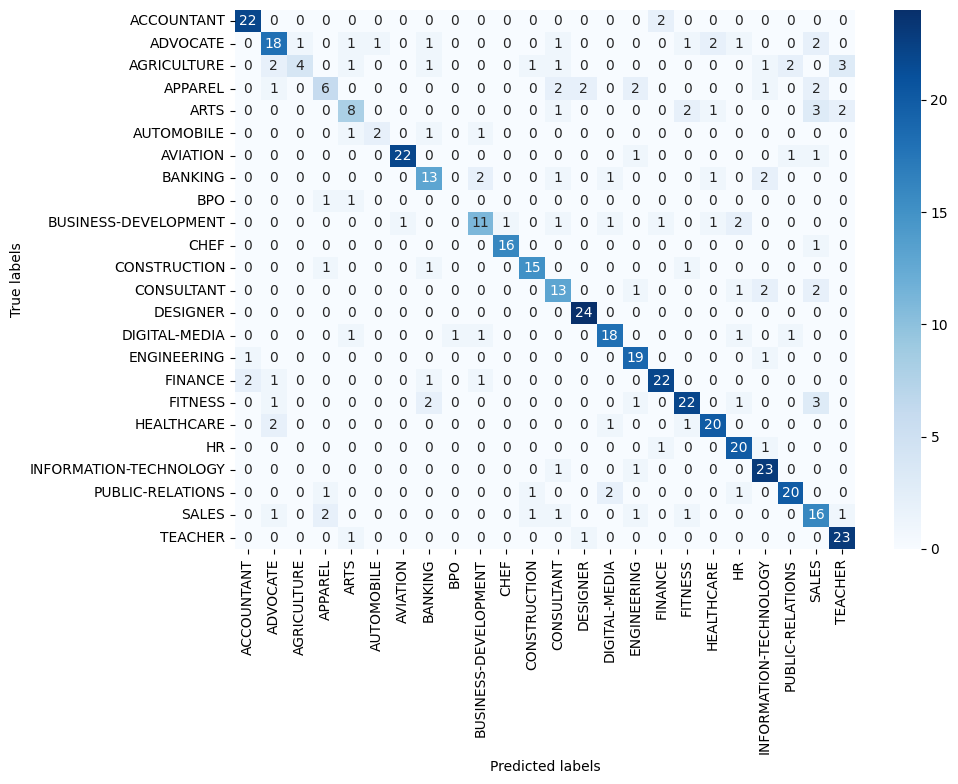

In [45]:
from sklearn.metrics import confusion_matrix
cm_lgb = confusion_matrix(y_test, lgb_prediction)
plt.figure(figsize=(10, 7))
sns.heatmap(cm_lgb, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

In [46]:
joblib.dump(lgb_model, 'RS_Model.pkl')

['RS_Model.pkl']

In [47]:
import joblib
vectorizer = joblib.load("RS_Model_Vectorizer.pkl")  # e.g., TfidfVectorizer
model = joblib.load("RS_Model.pkl")                  # e.g., KNeighborsClassifier
label_encoder = joblib.load("RS_LabelEncoder.pkl")
# Text cleaning function
stop_words = set(stopwords.words('english'))

def clean_input(text):
    text = re.sub(r"http\S+|www\S+|https\S+", '', text)
    text = re.sub(r'[^A-Za-z\s]', '', text)
    text = text.lower()
    return ' '.join([word for word in text.split() if word not in stop_words])

In [50]:
user_input = input("Paste your resume text:\n\n")
cleaned = clean_input(user_input)

# Transform and predict
vec = vectorizer.transform([cleaned]).toarray()
prediction = model.predict(vec)[0]
category = label_encoder.inverse_transform([prediction])[0]

print("\n Predicted Resume Category:", category)


 Predicted Resume Category: HR


In [64]:
pip install PyMuPDF


   ---------------------------------------- 0.0/18.7 MB ? eta -:--:--
    --------------------------------------- 0.3/18.7 MB ? eta -:--:--
   -- ------------------------------------- 1.0/18.7 MB 3.1 MB/s eta 0:00:06
   -- ------------------------------------- 1.0/18.7 MB 3.1 MB/s eta 0:00:06
   -- ------------------------------------- 1.0/18.7 MB 3.1 MB/s eta 0:00:06
   -- ------------------------------------- 1.0/18.7 MB 3.1 MB/s eta 0:00:06
   -- ------------------------------------- 1.0/18.7 MB 3.1 MB/s eta 0:00:06
   -- ------------------------------------- 1.0/18.7 MB 3.1 MB/s eta 0:00:06
   -- ------------------------------------- 1.3/18.7 MB 714.3 kB/s eta 0:00:25
   --- ------------------------------------ 1.8/18.7 MB 915.5 kB/s eta 0:00:19
   ---- ----------------------------------- 2.1/18.7 MB 995.7 kB/s eta 0:00:17
   ----- ---------------------------------- 2.4/18.7 MB 1.0 MB/s eta 0:00:16
   ----- ---------------------------------- 2.4/18.7 MB 1.0 MB/s eta 0:00:16
   ----

In [51]:
import os
import fitz  # PyMuPDF
import pandas as pd

# Path to resume PDFs
resume_dir = 'data/data'

resume_data = []

# Traverse through each category and PDF
for category in os.listdir(resume_dir):
    category_path = os.path.join(resume_dir, category)
    if os.path.isdir(category_path):
        for file in os.listdir(category_path):
            if file.endswith('.pdf'):
                file_path = os.path.join(category_path, file)
                try:
                    doc = fitz.open(file_path)
                    text = ''
                    for page in doc:
                        text += page.get_text()
                    resume_data.append({
                        'filename': file,
                        'category': category,
                        'text': text
                    })
                except Exception as e:
                    print(f"Error reading {file}: {e}")

# Convert to DataFrame
pdf_df = pd.DataFrame(resume_data)
print(pdf_df.head())


Error reading 92200491.pdf: Failed to open file 'data/data\\SALES\\92200491.pdf'.
Error reading 98108571.pdf: Failed to open file 'data/data\\SALES\\98108571.pdf'.
Error reading 98509238.pdf: Failed to open file 'data/data\\SALES\\98509238.pdf'.
Error reading 10504237.pdf: Failed to open file 'data/data\\TEACHER\\10504237.pdf'.
Error reading 10527994.pdf: Failed to open file 'data/data\\TEACHER\\10527994.pdf'.
Error reading 10909720.pdf: Failed to open file 'data/data\\TEACHER\\10909720.pdf'.
Error reading 11336022.pdf: Failed to open file 'data/data\\TEACHER\\11336022.pdf'.
Error reading 11616482.pdf: Failed to open file 'data/data\\TEACHER\\11616482.pdf'.
Error reading 11943065.pdf: Failed to open file 'data/data\\TEACHER\\11943065.pdf'.
Error reading 12467531.pdf: Failed to open file 'data/data\\TEACHER\\12467531.pdf'.
Error reading 12587973.pdf: Failed to open file 'data/data\\TEACHER\\12587973.pdf'.
Error reading 13087952.pdf: Failed to open file 'data/data\\TEACHER\\13087952.pdf'

In [52]:
import re
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import nltk

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)
    text = re.sub(r'\@w+|\#','', text)
    text = re.sub(r'\d+', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    words = text.split()
    words = [stemmer.stem(word) for word in words if word not in stop_words]
    return " ".join(words)

# Clean all resume texts
pdf_df['cleaned_text'] = pdf_df['text'].apply(clean_text)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Muzam\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [53]:
job_desc = input("Paste the Job Description:\n\n")
cleaned_jd = clean_text(job_desc)
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

tfidf_vectorizer = TfidfVectorizer()
resume_tfidf = tfidf_vectorizer.fit_transform(pdf_df['cleaned_text'])
jd_tfidf = tfidf_vectorizer.transform([cleaned_jd])

cosine_similarities = cosine_similarity(jd_tfidf, resume_tfidf).flatten()

pdf_df['similarity'] = cosine_similarities

top_matches = pdf_df.sort_values(by='similarity', ascending=False)
print("\nTop Matching Resumes:\n")
print(top_matches[['filename', 'category', 'similarity']].head(5))





Top Matching Resumes:

          filename category  similarity
1950  17812897.pdf       HR    0.465497
1995  28175164.pdf       HR    0.410357
1971  21830565.pdf       HR    0.402125
1975  23510685.pdf       HR    0.400386
1955  18316239.pdf       HR    0.376818


In [54]:
import joblib
joblib.dump({
    'model': model,
    'vectorizer': vectorizer,
    'label_encoder': label_encoder
}, 'resume_screening_pipeline.pkl')

['resume_screening_pipeline.pkl']